# **Project Name**    - **Coronovirus Tweet Sentiment Analysis**



##### **Project Type**    - Classification




##### **Contribution**    - Individual

# **Project Summary**

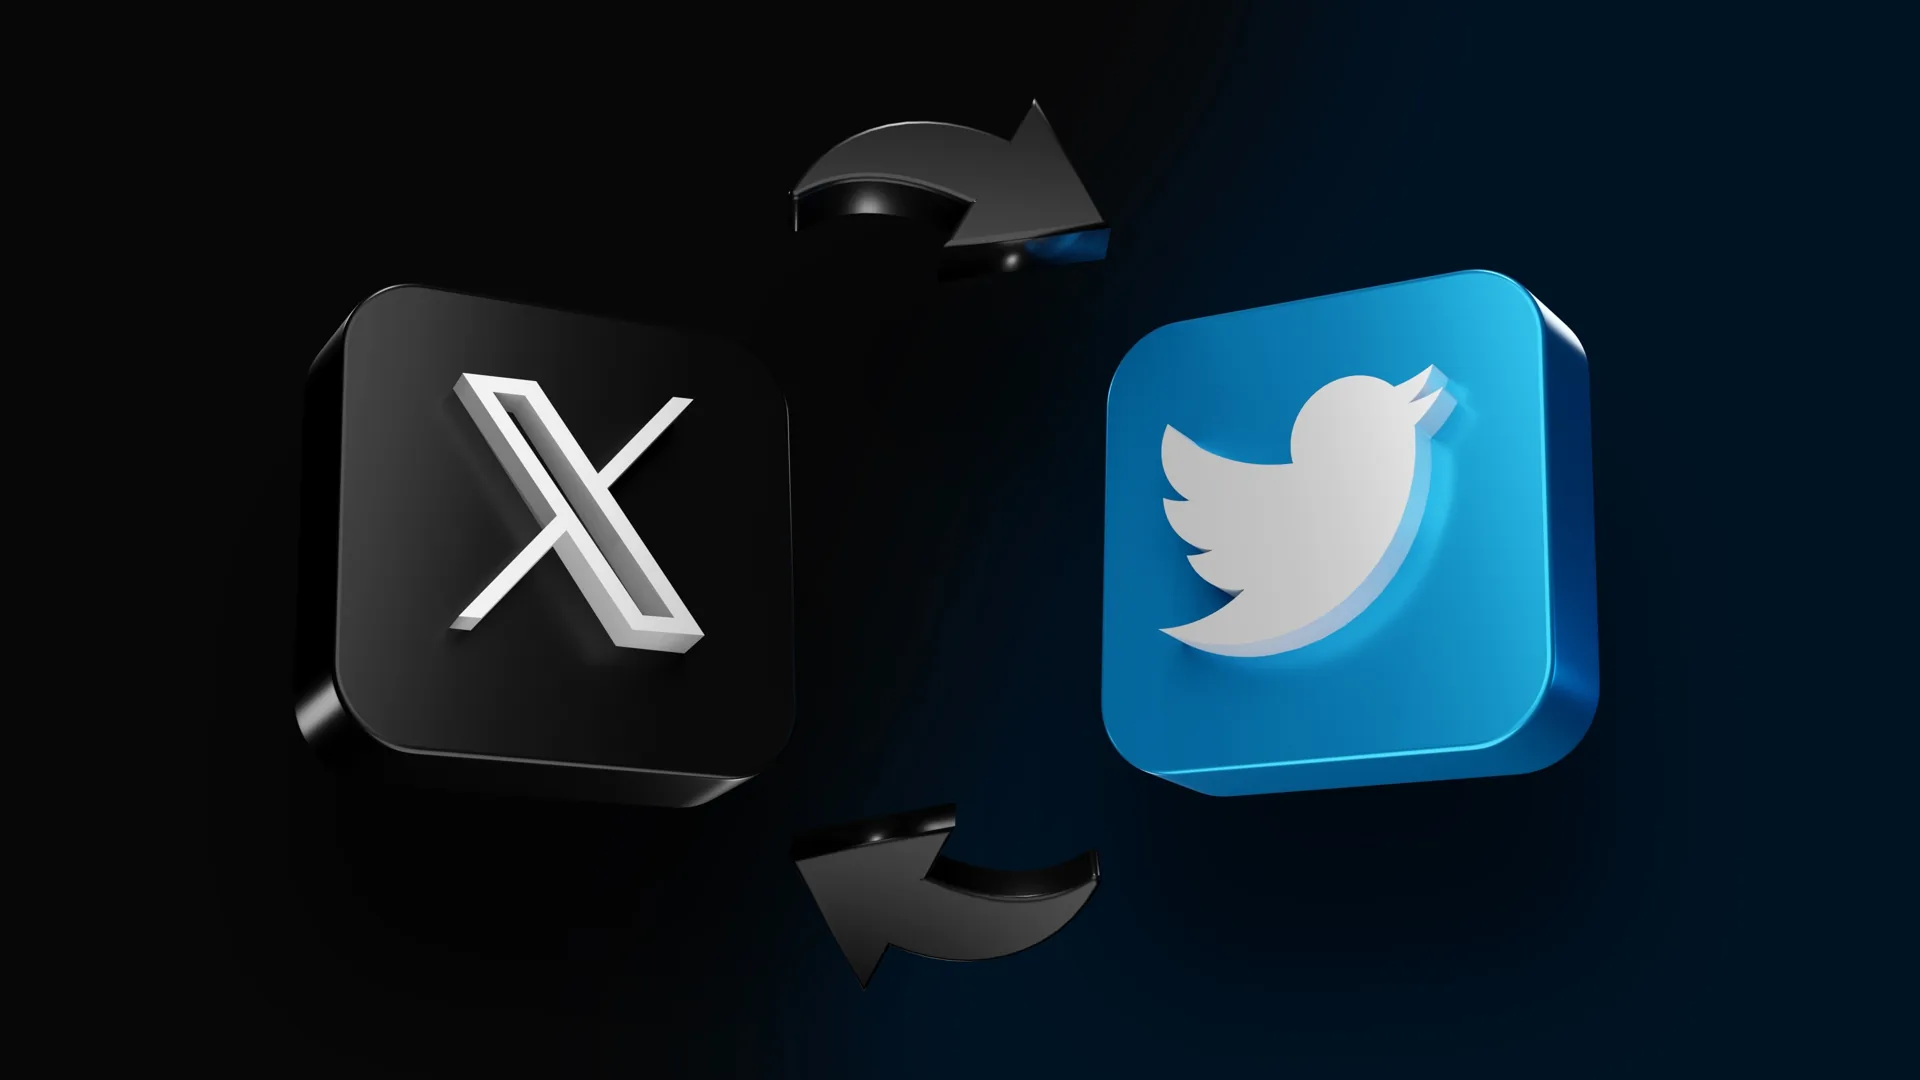

In this project, we have a dataset that contain tweets that has been pulled from Twitter and manual tagging has been done. The main objective is to build a classification model to predict the sentiment of COVID-19 tweets. The dataset has a total of  rows with 8 columns. Further exploring the dataset found out that there are some null or missing values present in dataset, this missing values are only present in Location column.


The columns in the dataset are UserName, ScreenName, Location, TweetAt, OriginalTweet and Sentiment which provide details about the tweet that means what was the original tweet, when that tweet was done? User belongs to which location and so on. For data wrangling, first of all, I created a copy of the original dataset so that further analysis and changes made to the data do not affect the original one. As exploring the dataset more we got to know that their are many noise in the location column as location have many missing values and unrelated information instead of location.


I visualized the data and found out some important details about Tweets. Plotted a bar plot to view the top 10 location from where maximum number of tweets were done, plotted pie-chart to view distribution of Sentiment in percentage. Found out other details like when most of the tweets were done. Sentiment variable is the dependent variable for this project and for independent variable we will transform the OriginalTweet as we cannot directly feed words to machine this entire process of converting words is known as textual data preprocessing.


As we have textual data in our dataset so it is important to do textual data preprocessing which includes expand contractions, lower casing, removing punctuations, removing URLs & digits contain digits, removing stopwords, tokenization, text normalization and POS Tagging. Performed these preprocessing and divided the data as independent and dependent variable. Train_test_split is used to divide the data into 80/20 ratio from which 20% data will be used by testing data. After that I have used Count Vectorizer and TF-IDF Vectorizer for converting text to numerical vectors.


For Model implementation, first of all Logistic regression is used, after that I implemented Decision Classifier, Random Forest Classifier, K-Neighbor Classifier and Naive Bayes Classifier with both Count Vectorizer and TF-IDF Vectorizer. We obtained accuracy for every model and based on accuracy we decided which model is performing the best.


# **GitHub Link -**

https://github.com/Shubhangi-Tiwari/Coronavirus-Tweet-Sentiment-Analysis

# **Problem Statement**


**This challenge is to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
path='/content/drive/MyDrive/Coronavirus Tweets.csv'
tweet_df=pd.read_csv(path,encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
tweet_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
tweet_df.shape

In [ ]:
# Dataset Info
tweet_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
tweet_df.duplicated()

In [ ]:
#Dataset Duplicate Value Count
tweet_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
tweet_df.isnull()

In [ ]:
#Total of missing values
tweet_df.isna().sum()

In [ ]:
# Visualizing the missing values
msno.matrix(tweet_df)

### What did you know about your dataset?

The dataset consist of total 41157 rows and 6 columns. The variable names are UserName, ScreenName, Location, TweetAt, Sentiment and OriginalTweet.Datatype for each variable seems to be correct so there is no change needed for datatype. There are total 8590 missing values in Location variable only, no other missing values are there in remaining columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
tweet_df.columns

In [ ]:
# Dataset Describe
tweet_df.describe(include='all')

### Variables Description

UserName- **Coded UserName for the User**

ScreenName - **Coded ScreenName for the User**

Location- **Region of Origin**

TweetAt - **Timing of Tweet**

OriginalTweet - **First tweet in the thread**

Sentiment- **Sentiment of the tweet**

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in tweet_df.columns.tolist():
  print('Number of unique values for', i, 'is', tweet_df[i].nunique())

In [ ]:
#Checking count for location just to view which location have most of the tweets
tweet_df['Location'].value_counts()

In [ ]:
#Checking count for Sentiment just to view which sentiment have highest tweet
tweet_df['Sentiment'].value_counts()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Created a copy of dataset so that further analysis can be done on that dataframe without affecting original data
df=tweet_df.copy()

In [ ]:
#Viewing dataset for location as found a different value other than location in location column, that means data needs to be cleaned as random values are present
df.loc[40057:41157,['Location']]

### What all manipulations have you done and insights you found?

Created a copy for original dataset of tweets, as viewed some random rows and columns in dataset got to know that Location column have some wrong information like there is a Location which is not any location name whereas seems to be incorrect location name, also there are many missing values in Location column but as we are only going to deal with Sentiment and OriginalTweet column so no changes made in location column.

Most of the manipulation needs to be done on Sentiment and OriginalTweet column where we need to do text preprocessing of OriginalTweet and create some new features for model implementation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
tweet_location=df['Location'].value_counts()[:10]
plt.figure(figsize=(12,6))
sns.barplot(y=tweet_location,x=tweet_location.index,orient='v',palette='cool')
plt.xlabel('Location')
plt.ylabel('Total number of tweets')
plt.title('Top 10 Country with the most tweet')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

To show top 10 Location wrt number of tweets I used bar charts as its easy to understand data and visually appealing to get quick data insights without digging much.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the bar chart will help us to understand from which location maximum number of tweets were done, chart shows that maximum tweets is done from London followed by United States, New York, Washington, United Kingdom, Los Angeles, India, UK and Australia.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights definitely help in creating a positive business impact as we get to know that London is the location from where most of the tweets are present but as we are doing sentiment analysis we are not going to use thes particular column, its just to get to know dataset.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
sentiment_type= df['Sentiment'].value_counts()
pie_labels=['Positive', 'Negative','Neutral','Extremely Positive', 'Extremely Negative']
palette_color = sns.color_palette('bright')
plt.pie(sentiment_type, labels= pie_labels,colors=palette_color, autopct='%0.1f%%')

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.

To show different type of Sentiment in percentage form I used pie chart as it gives proper percent of each type with their value proportion in pie.

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart is that there are 5 kinds of Sentiment, from which Positive Sentiment is the highest with 27.8% followed by Negative Sentiment which is 21.1%. Other sentiments like Neutral,Extremely Negative, Extremely Positive are 18.7%, 13.3% and 16.1%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help creating a positive business impact as it shows the sentiment of tweets done by people as we can see positive sentiment tweets are the most that makes us understand more about Sentiment variable.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
tweet_location1=df['Location'].value_counts()[-10:]
plt.figure(figsize=(12,6))
sns.barplot(y=tweet_location1,x=tweet_location1.index,orient='v',palette='deep')
plt.xlabel('Location')
plt.ylabel('Least number of tweets')
plt.title('10 Country with the least number of tweet')
plt.xticks(rotation=30)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

To show 10 Location wrt least number of tweets I used bar charts as its easy to understand data and visually appealing to get quick data insights without digging much.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the bottom 10 locations with least numbers of tweets as we can clearly see from the chart in Location last location is not correct, which proves location column have some incorrect details in data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It definitely helps to understand incorrect data details in location, which will in turn help us to take appropriate action before using this column for data processing or model implementation.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
most_tweet=df['TweetAt'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=most_tweet,x=most_tweet.index,orient='v',palette='rocket')
plt.xlabel('Tweet Timing')
plt.ylabel('Total number of tweets')
plt.title('Top 10 Date with the most tweet')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Bar graphs are the pictorial representation of data in the form of vertical or horizontal rectangular bars, where the length of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.

To show top 10 Date for tweets wrt number of tweets I used bar charts as its easy to understand data and visually appealing to get quick data insights without digging much.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart shows us that maximum number of tweets were done on 20-03-2020, followed by 19-03-2020 and other dates from same month,followed by 04 month. This gives us an idea that most of the tweets were done in 03 month which is March 2020 that was the time when most of the Corono cases was found in India and lockdowns were announced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help us to understand sentiment of those tweet in the early phase of corono and later on.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12,6))
sns.boxplot(data=df,palette='rocket')
plt.xlabel('Username & ScreenName')
plt.ylabel('Tweets')
plt.title('Box Plot for Username and ScreenName')
plt.show()


##### 1. Why did you pick the specific chart?

Box and whisker plots, sometimes known as box plots, are a great chart to use when showing the distribution of data points across a selected measure. These charts display ranges within variables measured. This includes the outliers, the median, the mode, and where the majority of the data points lie in the “box”

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from box plot helps to understand if there are any outliers present in dataset or not but as most of the columns in dataset are categorical only username and screenname are the numerical value also they are coded to avoid privacy concerns, just to check for outliers we used those two columns but there are no such outliers present.

#### Chart - 6 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
correlation_data=df.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_data,annot=True,fmt='.2f', annot_kws={'size': 10},vmax=.8, square=True)

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

The correlation matrix provides us with an indication of how well (or not so well) each feature is correlated with each other.

Thus, I used this correlation heatmap to find correlation between all the variables along with correlation coefficient.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is not that useful as most of the columns in data are categorical and the only numerical columns have same data so this chart does not give us any new information.

#### Chart - 7 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplot visualizes given data to find the relationship between them where the
variables can be continuous or categorical. Plot pairwise relationships in a data-set.

Pairplot is good to visualize multiple variable with the same time and visualize the relation between each variable. It creates scatter and histogram to show relation and skewness of data.

##### 2. What is/are the insight(s) found from the chart?

As we already seen in correlation heatmap that most of the columns are categorical hence they are not present in chart and other numerical columns are having same data so same can be seen in chart but it doesn't help us lot to dig more.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
'''There are missing values in Location column but for prediction we are not going to use Location column
so no removed any values as it will effect the other columns, also cannot add any random location as its a categorical column.'''

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are missing values in Location column but for prediction we are not going to use Location column
so not removed any values as it will effect the other columns, also cannot add any random location for missing values as its a categorical column.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''Most of the columns are categorical hence no outlier treatment has been done'''

##### What all outlier treatment techniques have you used and why did you use those techniques?

As most of the columns are categorical hence we can't do outliers treatment for categorical variables also there are no significant outliers present so no outlier treatment has been done.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

No such categorical encoding techniques were used as we are predicting sentiment for tweets only hence Sentiment column is used.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
#Installing contraction library
!pip install contractions

In [ ]:
#using contraction library in order to expand and create common English contractions in text
import contractions

def expand_contractions(text):
   expanded_text = contractions.fix(text)
   return expanded_text

In [ ]:
#Applying function of expand_contractions to dataset and creating a new feature named as "contracted_tweet"
df['contracted_tweet'] = df['OriginalTweet'].apply(expand_contractions)

In [ ]:
#Viewing the dataframe after adding new feature
df.head(10)

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['contracted_tweet']=df['contracted_tweet'].str.lower()
df['contracted_tweet']

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
#Apply function to each example
df['contracted_tweet'] = df['contracted_tweet'].apply(remove_punctuation)
df.head(10)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
df['contracted_tweet'] = df['contracted_tweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
#Remove digits, special characters or any other alphanumeric characters
df['contracted_tweet'] = df['contracted_tweet'].str.replace('\d+', '')
df['contracted_tweet']=df['contracted_tweet'].str.replace('(@\w+.*?)',"")
df['contracted_tweet']=df['contracted_tweet'].str.replace('[^\w\s]','')

In [ ]:
#Viewing the data once to check if characters removed or not
df.head(10)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
#Importing nltk library for NLP to preprocess text data
import nltk
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

In [ ]:
print("Number of stopwords: ", len(sw))

In [ ]:
#Writing a function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
#Applying the stopwords function to dataframe and viewing the data once
df['contracted_tweet'] = df['contracted_tweet'].apply(stopwords)
df.head(20)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
df.head(20)

#### 7. Tokenization and text Normalization

In [ ]:
#Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split(' ')]
    return " ".join(text)

In [ ]:
#Applying stemming function to data using apply method
df['stemmed_words']=df['contracted_tweet'].apply(stemming)

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of lemmatizing function
lemmatizer = WordNetLemmatizer()

def lemmatized_words(text):
    '''a function which lemmatize each word in the given text'''
    text = [lemmatizer.lemmatize(word) for word in text.split( )]
    return " ".join(text)

In [ ]:
#Applying lemmatized_words function to data using apply method
df['lemmatized_words']=df['contracted_tweet'].apply(lemmatized_words)

In [ ]:
#Viewing data after adding new features for lemmatized and stemmed words
df.tail()

##### Which text normalization technique have you used and why?

Stemming and Lemmatization this two techniques are used for text normalization as this will reduce the number of unique tokens present in the text, removing the variations in a text. and also cleaning the text by removing redundant information.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
df['tag'] = nltk.pos_tag(df['contracted_tweet'])
df.head(10)

In [ ]:
#Viewing the data afrer adding tag as new feature for POS tagging
df.head(10)

### 4. Feature Manipulation & Selection

### 1. Data Scaling

In [ ]:
# Scaling your data
'''No scaling was done as we just need to analyse and predict sentiment of tweets'''

##### Which method have you used to scale you data and why?

  No Data Scaling have been done as we just need to analyse and predict sentiment of tweets.

### 2. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, Dimensionality reduction is not needed as we just need to predict the sentiment of COVID-19 tweets hence respective variable have been already selected.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced, we are only working on Sentiment variable as dependent variable and OriginalTweet as independent variable.

### 3. Data Splitting




In [ ]:
#As we will be working on sentiment column so just replacing extremely negative with negative and extremely positive to positive as both shows their respective emotion
df=df.replace({'Sentiment':{'Extremely Positive':'Positive','Extremely Negative':'Negative'}})

In [ ]:
#Feature will be saved as X whereas target will be saved as y
X=df['lemmatized_words']
y=df['Sentiment']

In [ ]:
#Spliting data into train and test sets, this will be done using train test split,taking ratio as 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [ ]:
#Viewing the shape for training dataset
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

In [ ]:
#Viewing the distribution classes for dependent variable for both training and testing dataset
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

In [ ]:
#Viewing the training set
y_train.head()

##### What data splitting ratio have you used and why?

80/20 ratio is used for splitting data, I have used this ratio because studies show that the best results are obtained if we use 20-30% of the data for testing, and the remaining 70-80% of the data for training.Thats why I choosed to split data into 80/20.

#### 10. Text Vectorization

In [ ]:
#Importing countvectorizer and tfidfvectorizer for vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Create a Vectorizer Object using Count Vectorizer
count_vec=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))

#Implementing count vectorizer for training data set
train_count=count_vec.fit_transform(X_train.astype(str).str.strip())

#Implementing count vectorizer for testing data set
test_count=count_vec.transform(X_test.astype(str).str.strip())

In [ ]:
# Creating a vectorizer object using tf-idf vectorizer
tf_train=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)

#Implementing tf-idf vectorizer for training data set
tf_train_count=tf_train.fit_transform(X_train.astype(str).str.strip())

#Implementing tf-idf vectorizer for testing data set
tf_test_count=tf_train.transform(X_test.astype(str).str.strip())

##### Which text vectorization technique have you used and why?

TF-IDF and Count Vectorizer are used for text vectorization. Count vectorizer is used for its simplicity,speed and efficiency as its easy to use and understand also can handle large text datasets with many documents.

TF-IDF is used to identify which terms are most relevant to a particular document.


## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression with Count Vectorizer

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Fit the Algorithm
clf.fit(train_count, y_train)

# Predict on the model
y_train_pred= clf.predict(train_count)
y_test_pred= clf.predict(test_count)

In [ ]:
# Get the model coefficients
clf.coef_

In [ ]:
#Get the predicted probabilities
train_preds = clf.predict_proba(train_count)
test_preds = clf.predict_proba(test_count)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(train_count)
test_class_preds = clf.predict(test_count)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,test_class_preds))

In [ ]:
# Visualizing evaluation Metric Score chart
cf_mat_clf= (confusion_matrix(y_test,test_class_preds))
plt.figure(figsize=(9,6))
ax= plt.subplot()
sns.heatmap(cf_mat_clf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
labels=['Positive','Negative','Neutral']
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('Actual labels', fontsize=12)
ax.set_title('Confusion Matrix (Logistic Regg with Count Vectorizer)', fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lr=LogisticRegression()
parameters= dict(C=[100,10,1.0,0.1,0.01],penalty=['l1','l2'])

#Tuning using GridSearchCV
lr_cv_gscv=GridSearchCV(lr,parameters,cv=5)

# Fit the Algorithm
lr_cv_gscv.fit(train_count,y_train)

# Predict on the model
pred_lr_cv_gscv = lr_cv_gscv.predict(test_count)

In [ ]:
#Accuracy
accuracy_lr_gscv = accuracy_score(y_test,pred_lr_cv_gscv)
print("Accuracy :",(accuracy_lr_gscv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_cv_gscv))

In [ ]:
# Visualizing evaluation Metric Score chart
cf_mat_lr_gscv= (confusion_matrix(y_test,pred_lr_cv_gscv))
plt.figure(figsize=(9,6))
ax= plt.subplot()
sns.heatmap(cf_mat_clf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
labels=['Positive','Negative','Neutral']
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('Actual labels', fontsize=12)
ax.set_title('Confusion Matrix (Logistic Reg with Count Vectorizer)', fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Implementing Logistic Regression provides 79% of accuracy, also classification report provide other evaluation metrics as well such as f1-score, recall and precision.

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV hyperparameter optimization technique is used so that best parameter can be choosed for the model.Used regularization penalty L1 and L2 with cv parameter set to 5.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is improvement in accuracy that can also be seen in evaluation metric score chart as Accuracy is 79% and f1-score,Precision and Recall is 77%

### ML Model - 2 - Decision Tree Classifier with Count Vectorizer

In [ ]:
# ML Model - 2 Implementation
decision_classifier = DecisionTreeClassifier()

# Fit the Algorithm
decision_classifier.fit(train_count,y_train)

# Predict on the model
pred_dc=decision_classifier.predict(train_count)

In [ ]:
#Viewing the predicted value
pred_dc

In [ ]:
# Get the predicted classes
train_dc_preds = decision_classifier.predict(train_count)
test_dc_preds = decision_classifier.predict(test_count)

In [ ]:
# Get the accuracy scores
train_dc_accuracy = accuracy_score(train_dc_preds,y_train)
test_dc_accuracy = accuracy_score(test_dc_preds,y_test)

print("The accuracy on train data is ", train_dc_accuracy)
print("The accuracy on test data is ", test_dc_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,test_dc_preds))

In [ ]:
# Visualizing evaluation Metric Score chart
cf_mat_dc= (confusion_matrix(y_test,test_dc_preds))
plt.figure(figsize=(9,6))
ax= plt.subplot()
sns.heatmap(cf_mat_dc, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
labels=['Positive','Negative','Neutral']
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('Actual labels', fontsize=12)
ax.set_title('Confusion Matrix (Decision Tree with Count Vectorizer)', fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
cv_score_dc_cv= cross_val_score(decision_classifier,train_count,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dc_cv)))

##### Which hyperparameter optimization technique have you used and why?

cross_val_score is the hyper parameter optimization technique used with cv parameter of 5 folds. This parameter is used to choose the best value to increase accuracy and overall score.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as hyperparameter tuning helps to find the optimal result from all possible combinations.

### ML Model - 3 - Random Forest Classifier with Count Vectorizer

In [ ]:
# ML Model - 3 Implementation
ran_classifier = RandomForestClassifier()

# Fit the Algorithm
ran_classifier.fit(train_count,y_train)

# Predict on the model
pred_ran_cv=ran_classifier.predict(test_count)

In [ ]:
pred_ran_cv

In [ ]:
# Get the predicted classes
train_ranf_preds = ran_classifier.predict(train_count)
test_ranf_preds = ran_classifier.predict(test_count)

In [ ]:
# Get the accuracy scores
train_ranf_accuracy = accuracy_score(train_ranf_preds,y_train)
test_ranf_accuracy = accuracy_score(test_ranf_preds,y_test)

print("The accuracy on train data is ", train_dc_accuracy)
print("The accuracy on test data is ", test_dc_accuracy)

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_ran_cv))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Plotting Confusion matrix
cf_ran_cv= (confusion_matrix(y_test,pred_ran_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_ran_cv, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with Count Vectorizer)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques

classifier = RandomForestClassifier()

# Accuracy
cv_score_ran_cv= cross_val_score(classifier,train_count,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_ran_cv)))

In [ ]:
# Hyperparameter tuning

classifi = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[10,20,30,40,50], 'max_depth':[3, 5,7,9]}
classifi = GridSearchCV(classifi, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
classifi.fit(train_count, y_train)

# Predict on the model
pred_ranfor_cv=classifi.predict(test_count)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV hyperparameter optimization technique is used with n_estimators parameters to find the best parameter for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There can be seen improvement in accuracy which is shown in evaluation metric score chart.

### ML Model - 4 - K-Nearest Neighbors with Count Vectorizer

In [ ]:
# ML model - Implementation of a knn classifier with k neighbors
knn = KNeighborsClassifier()

# Fit the Algorithm
knn.fit(train_count,y_train)

# Predict on the model
pred_knn_cv=knn.predict(test_count)

In [ ]:
knn.score(test_count,y_test)

In [ ]:
pred_knn_cv

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

In [ ]:
# Visualizing evaluation Metric Score chart
# Plotting Confusion matrix
knn_cf_cv= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(knn_cf_cv, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (K-Nearest Neighbors with Count Vectorizer)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,9)}
knn_gscv_cv= GridSearchCV(knn,param_grid,cv=5)
#Fit the model
knn_gscv_cv.fit(train_count,y_train)
#predicted values
pred_gscv_knn_cv = knn_gscv_cv.predict(test_count)

In [ ]:
pred_gscv_knn_cv

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_gscv_knn_cv)
print("Accuracy :",(accuracy_KNN))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_gscv_knn_cv))

In [ ]:
cf_mat_knn= (confusion_matrix(y_test,pred_gscv_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_mat_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (K-Nearest Neighbors with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV hyperparameter optimization technique is used to select the best parameter from the list of parameter applied as param_grid to the data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is improvement in terms of accuracy by using this gridsearchcv parameter hence it is important to check for better values using hyperparameter tuning.

### ML Model - 5 - Naive Bayes Classifier with Count Vectorizer

In [ ]:
#Using .toarray() to convert to a dense numpy array
train_count_naive=train_count.toarray()
test_count_naive=test_count.toarray()

In [ ]:
#ML model - Implementation of a Naive Bayes
naive_gau=GaussianNB()

#Fit the model
naive_model = naive_gau.fit(train_count_naive,y_train)

#Predict on the model
pred_naive_cv=naive_model.predict(test_count_naive)

In [ ]:
accuracy_naive = accuracy_score(y_test,pred_naive_cv)
print(accuracy_score(y_test,pred_naive_cv))

In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_naive_cv))

In [ ]:
cf_mat_naive= (confusion_matrix(y_test,pred_naive_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_mat_naive, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Naive Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy evaluation metrics is used to determine how good the model is working, using classsfication report we have also looked for Precison, Recall and F1 Score.

#**Model Implementation using TF-IDF Vectorizer**

### ML Model- Logistic Regression with TF-IDF Vectorizer

In [ ]:
tf_train_count_ar=tf_train_count.toarray()
tf_test_count_ar=tf_test_count.toarray()

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Fit the Algorithm
clf.fit(tf_train_count_ar,y_train)

# Predict on the model
y_train_pred_tf= clf.predict(tf_train_count_ar)
y_test_pred_tf= clf.predict(tf_test_count_ar)

In [ ]:
#Get the predicted probabilities
y_train_pred_tf = clf.predict_proba(tf_train_count_ar)
y_test_pred_tf= clf.predict_proba(tf_test_count_ar)

In [ ]:
# Get the predicted classes
y_train_class_pred_tf = clf.predict(tf_train_count_ar)
y_test_class_pred_tf = clf.predict(tf_test_count_ar)

In [ ]:
# Get the accuracy scores
train_accuracy_tf = accuracy_score(y_train_class_pred_tf,y_train)
test_accuracy_tf = accuracy_score(y_test_class_pred_tf,y_test)

print("The accuracy on train data is ", train_accuracy_tf)
print("The accuracy on test data is ", test_accuracy_tf)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,y_test_class_pred_tf))

In [ ]:
# Visualizing evaluation Metric Score chart
cf_mat_clf_tf= (confusion_matrix(y_test,y_test_class_pred_tf))
plt.figure(figsize=(9,6))
ax= plt.subplot()
sns.heatmap(cf_mat_clf_tf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
labels=['Positive','Negative','Neutral']
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('Actual labels', fontsize=12)
ax.set_title('Confusion Matrix (Logistic Reg with TF-IDF Vectorizer)', fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques
lr1=LogisticRegression()
parameters= dict(C=[100,10,1.0,0.1,0.01],penalty=['l1','l2'])

#Tuning using GridSearchCV
lr_tf_gscv=GridSearchCV(lr1,parameters,cv=5)

# Fit the Algorithm
lr_tf_gscv.fit(tf_train_count,y_train)

# Predict on the model
pred_lr_tf_gscv = lr_tf_gscv.predict(tf_test_count)

In [ ]:
#Accuracy
accuracy_lr_gscv_tf = accuracy_score(y_test,pred_lr_tf_gscv)
print("Accuracy :",(accuracy_lr_gscv_tf))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tf_gscv))

In [ ]:
# Visualizing evaluation Metric Score chart
cf_mat_lr_gscv_tf= (confusion_matrix(y_test,pred_lr_tf_gscv))
plt.figure(figsize=(9,6))
ax= plt.subplot()
sns.heatmap(cf_mat_lr_gscv_tf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
labels=['Positive','Negative','Neutral']
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('Actual labels', fontsize=12)
ax.set_title('Confusion Matrix (Logistic Reg with TF-IDF Vectorizer)', fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV hyperparameter optimization technique is used so that best parameter can be choosed for the model.

### ML Model - Decision Tree Classifier with TF-IDF Vectorizer

In [ ]:
# ML Model - 2 Implementation
decision_classifier = DecisionTreeClassifier()

# Fit the Algorithm
decision_classifier.fit(tf_train_count,y_train)

# Predict on the model
pred_dc_tf=decision_classifier.predict(tf_train_count)

In [ ]:
#Viewing the predicted value
pred_dc_tf

In [ ]:
# Get the predicted classes
train_dc_tf_preds = decision_classifier.predict(tf_train_count)
test_dc_tf_preds = decision_classifier.predict(tf_test_count)

In [ ]:
# Get the accuracy scores
train_dc_tf_accuracy = accuracy_score(train_dc_tf_preds,y_train)
test_dc_tf_accuracy = accuracy_score(test_dc_tf_preds,y_test)

print("The accuracy on train data is ", train_dc_tf_accuracy)
print("The accuracy on test data is ", test_dc_tf_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,test_dc_tf_preds))

In [ ]:
# Visualizing evaluation Metric Score chart
cf_mat_dc_tf= (confusion_matrix(y_test,test_dc_tf_preds))
plt.figure(figsize=(9,6))
ax= plt.subplot()
sns.heatmap(cf_mat_dc_tf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
labels=['Positive','Negative','Neutral']
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('Actual labels', fontsize=12)
ax.set_title('Confusion Matrix (Decision Tree with TF-IDF Vectorizer)', fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques
cv_score_dc_tf= cross_val_score(decision_classifier,tf_train_count,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dc_tf)))

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning have been done to check if we can get better value for the model, so used cross_val_score to view the accuracy after tuning.

### ML Model - Random Forest Classifier with TF-IDF Vectorizer

In [ ]:
# ML Model - Implementation
ran_classifier = RandomForestClassifier()

# Fit the Algorithm
ran_classifier.fit(tf_train_count,y_train)

# Predict on the model
pred_ran_tf=ran_classifier.predict(tf_test_count)

In [ ]:
pred_ran_tf

In [ ]:
# Get the predicted classes
train_ranf_tf_preds = ran_classifier.predict(tf_train_count)
test_ranf_tf_preds = ran_classifier.predict(tf_test_count)

In [ ]:
# Get the accuracy scores
train_ranf_tf_accuracy = accuracy_score(train_ranf_tf_preds,y_train)
test_ranf_tf_accuracy = accuracy_score(test_ranf_tf_preds,y_test)

print("The accuracy on train data is ", train_ranf_tf_accuracy)
print("The accuracy on test data is ", test_ranf_tf_accuracy)

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_ran_tf))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Plotting Confusion matrix
cf_ran_tf= (confusion_matrix(y_test,pred_ran_tf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_ran_tf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with TF-IDF Vectorizer)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques

# Accuracy
cv_score_ran_tf= cross_val_score(classifier,tf_train_count,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_ran_tf)))

In [ ]:
# Hyperparameter tuning

classifi = RandomForestClassifier(n_estimators=100,random_state=40)

# Fit the object to train dataset
classifi.fit(tf_train_count, y_train)

#Predict on model
classifi_pred=classifi.predict(tf_test_count)
accuracy_rf_tf = (classifi_pred == y_test).mean()
print('Accuracy_rf:', accuracy_rf_tf)

##### Which hyperparameter optimization technique have you used and why?

Using cross_val_score, 0.71 accuracy was found out, again taking n_estimators as 100 and random state 40 again fitted the model and obtained a better accuract which is 0.72, there is not a major difference but still improvement can be seen.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvement have been seen in accuracy by hyperparameter tuning.

### ML Model - K Nearest Neighbors with TF-IDF Vectorizer

In [ ]:
# ML model - Implementation of a knn classifier with k neighbors
knn = KNeighborsClassifier()

# Fit the Algorithm
knn.fit(tf_train_count,y_train)

# Predict on the model
pred_knn_tf=knn.predict(tf_test_count)

In [ ]:
knn.score(tf_test_count,y_test)

In [ ]:
pred_knn_tf

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tf))

In [ ]:
# Visualizing evaluation Metric Score chart
# Plotting Confusion matrix
knn_cf_tf= (confusion_matrix(y_test,pred_knn_tf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(knn_cf_tf, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (K-Nearest Neighbors with TF-IDF Vectorizer)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

For building classification model, we have used several algorithm such as Logistic Regression, Decison Tree Classifier, Random Forest Classfier, K-Nearest Neighbors and Naive Bayes Classifier using Count Vectorizer and TF-IDF Vectorizer.

For implementation, Logistic Regression, Decison Tree Classifier, Random Forest Classfier, K-Nearest Neighbors and Naive Bayes Classifier using Count Vectorizer and TF-IDF Vectorizer were used.


**For Count Vectorizer we found out following results:**


As per implementation, the accuracy obtained for Logistic Regression was found to be 0.97 for training data and 0.78 for test data. After hyperparameter tuning we can see slight improve in accuracy. Other values like Precision, f1-Scure and Recall was also calculated using classification report.

For Decision Classifier accuracy found to be 0.99 for training data whereas for testing data accuracy was low as compare to logistic regression which was 0.70, hyperparameter tuning was performed as well but no such major value change was observed.

For RandomForest accuracy for training data is 0.99 which is too high whereas for test data accuracy is only 0.69, as soon as hyperparameter tuning is performed we can see an improve in accuracy which is changed to 0.75

For K - Nearest Neighbor, accuracy was found to be the least from all other models which was 0.32 only, using hyperparameter tuning gave an increase in accuracy to 0.39 but still it is very low accuracy for a model.

For Naive Bayes algorithm accuracy was found to be 0.53 which is comparatively less than logistic model and also not good for a model.


**For TF-IDF Vectorizer we found out following results:**


The accuracy obtained for Logistic Regression using TF-IDF vectorizer was found to be 0.89 for training data and 0.78 for test data. After hyperparameter tuning we can see slight improve in accuracy.

For Decision Classifier accuracy found to be 0.99 for training data whereas for testing data accuracy was low as compare to logistic regression which was 0.60, hyperparameter tuning was performed as well and their was very slight improvement can be seen in accuracy which changed to 0.61 still low for a good model.

For RandomForest accuracy for training data is 0.99 which is too high whereas for test data accuracy is only 0.71, as soon as hyperparameter tuning is performed we can see an improve in accuracy which is changed to 0.72.

For K - Nearest Neighbor, accuracy was found to be the least from all other models using TF-IDF vectorizer as well which was 0.22 only from which we can conclude that K-Nearest Neighbor is performing very bad as compare to other applied models.

From accuracy, we can clearly state that **Logistic Regression** is performing the best from any other model that have been implemented with accuracy of 0.78

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***